In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
df= pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")
print(df['  What is your current job role?  '])
cont_table= pd.crosstab(df['  What is your current job role?  '], df['Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?'])
print(cont_table)
print(chi2_contingency(cont_table))
chi2, p_value, dof, expected = chi2_contingency(cont_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p_value}")

0     Software Developer
1     Software Developer
2     Software Developer
3     Software Developer
4     Software Developer
5     Software Developer
6                 Others
7          IT Consultant
8     Software Developer
9     Software Developer
10    Software Developer
11    Software Developer
12    Software Developer
13    Software Developer
14    Software Developer
15    Software Developer
16                Others
17         IT Consultant
18    Software Developer
19         IT Consultant
20          Data Analyst
21    Software Developer
22    Software Developer
23         IT Consultant
24    Software Developer
25          Data Analyst
26    Software Developer
27          Data Analyst
28    Software Developer
29                Others
30                Others
31         IT Consultant
32         IT Consultant
33                Others
34          Data Analyst
Name:   What is your current job role?  , dtype: object
Do you think it has become more difficult to find jobs in this curren

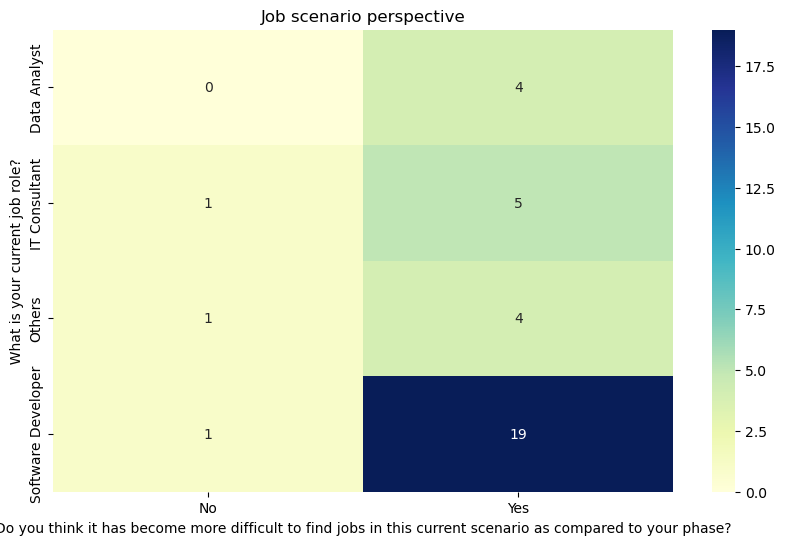

In [7]:
#heatmap plot for the above variables
# Heatmap plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(cont_table, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Job scenario perspective')
plt.ylabel('  What is your current job role?  ')
plt.xlabel('Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?')
plt.savefig('first-hypo',dpi=300)
plt.show()

In [23]:
import pandas as pd
from scipy.stats import chi2_contingency,chi2
df= pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")
cont_table= pd.crosstab(df['  What is your current job role?  '], df['Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?'])
print(cont_table)
# Calculate the Chi-Square statistic and p-value
chi2_calculated, p_value, dof, expected = chi2_contingency(cont_table)

# Calculate the critical value (tabulated Chi-Square) for alpha = 0.05
alpha = 0.05
chi2_tabulated = chi2.ppf(1 - alpha, dof)

# Output the results
print(f"Chi-Square Statistic (Calculated): {chi2_calculated}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-Square Statistic (Tabulated) at alpha = {alpha}: {chi2_tabulated}")

# Compare the calculated and tabulated values
if chi2_calculated > chi2_tabulated:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?  No  \
  What is your current job role?                                                                                 
Data Analyst                                                                                                 0   
IT Consultant                                                                                                1   
Others                                                                                                       1   
Software Developer                                                                                           1   

Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?  Yes  
  What is your current job role?                                                                                 
Data Analyst                                                                           

In [23]:
import pandas as pd
from scipy.stats import fisher_exact

# Load data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

# Create the contingency table
cont_table = pd.crosstab(df['  What is your current job role?  '], df['Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?'])

# Print the full contingency table
print(cont_table)

# Apply Fisher's Exact Test to each job role
for job_role in cont_table.index:
    # Create a 2x2 table by selecting the relevant subset
    role_table = cont_table.loc[[job_role], ['No', 'Yes']].astype(int)
    
    # Ensure it's a 2x2 table
    if role_table.shape == (1, 2):
        role_table = pd.DataFrame([[role_table.iloc[0, 0], 0], [role_table.iloc[0, 1], 0]], columns=['No', 'Yes'])

    # Perform Fisher's Exact Test
    _, p_value = fisher_exact(role_table)
    
    print(f"Fisher's Exact Test p-value for {job_role}: {p_value}")
    print("This is {} \n {}".format(job_role,role_table))
    
    # Decision based on p-value
    alpha = 0.05
    if p_value < alpha:
        print(f"Reject the null hypothesis for {job_role}")
    else:
        print(f"Fail to reject the null hypothesis for {job_role}")


Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?  No  \
  What is your current job role?                                                                                 
Data Analyst                                                                                                 0   
IT Consultant                                                                                                1   
Others                                                                                                       1   
Software Developer                                                                                           1   

Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?  Yes  
  What is your current job role?                                                                                 
Data Analyst                                                                           

In [13]:
#hypothesis between job role and education
#null hypothesis: Job role has no effect on the perception of education provided
#alternate hypothesis: Job role has an effect on the perception of education provided
import pandas as pd
from scipy.stats import chi2_contingency

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")
# print('these are the dataset columns \n {}'.format(df.columns))

# Create contingency table
cont_table = pd.crosstab(df['  What is your current job role?  '], df['How well do you think your education prepared you for your current job in the IT industry?  '])

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(cont_table)

# Print results
print(f"Chi-Square Statistic: {chi2}, p-value: {p_value}")

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Chi-Square Statistic: 5.367788461538462, p-value: 0.8011414753850756
Fail to reject the null hypothesis


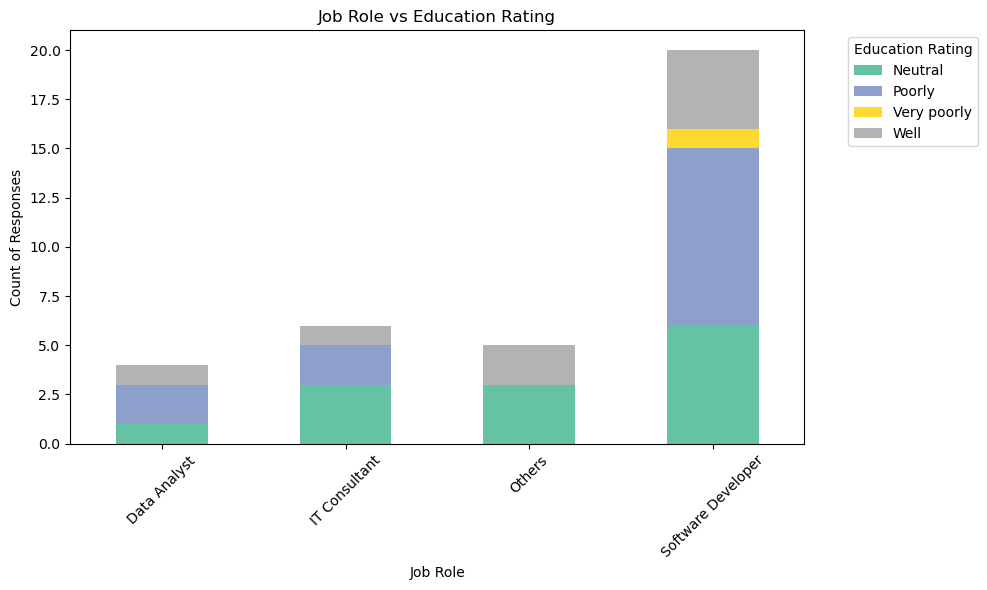

In [15]:
#graph to visualize job roles and the response about education provided
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

# Create a contingency table
cont_table = pd.crosstab(df['  What is your current job role?  '], df['How well do you think your education prepared you for your current job in the IT industry?  '])

# Plotting the stacked bar chart
cont_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Adding labels and title
plt.title('Job Role vs Education Rating')
plt.xlabel('Job Role')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45)
plt.legend(title='Education Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('second-hypo',dpi=300)
plt.show()


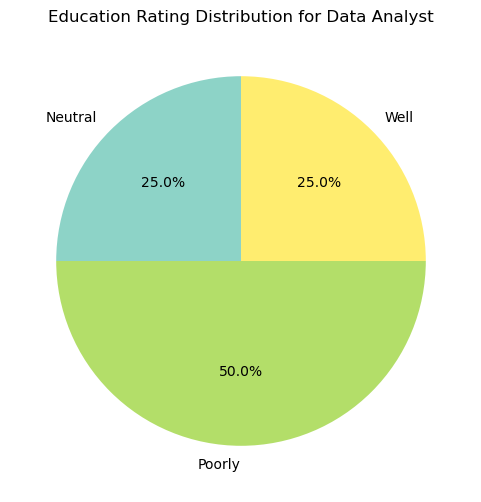

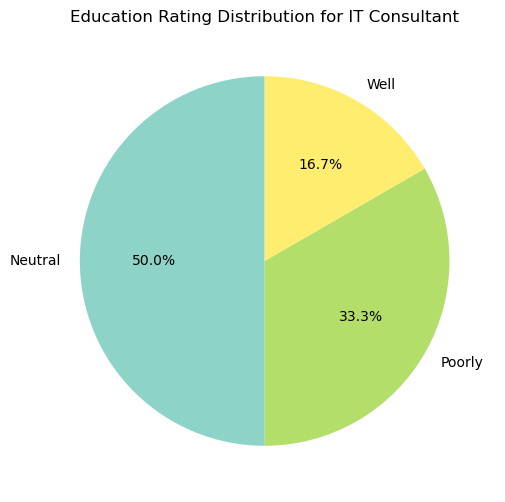

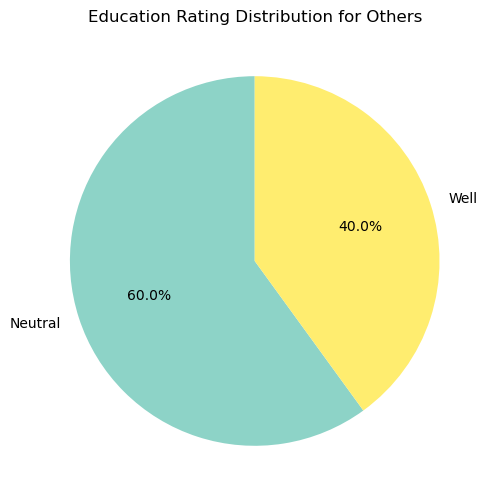

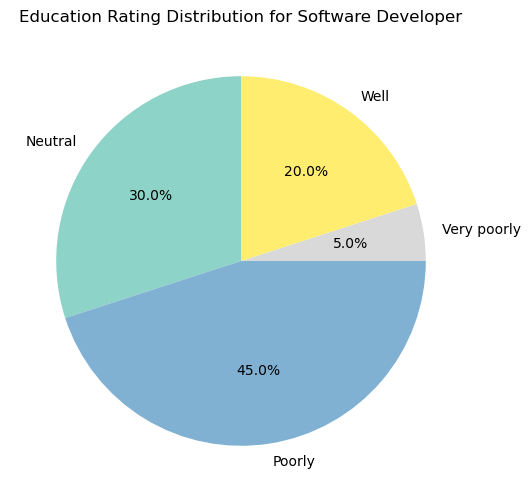

In [21]:
#graph to visualize job roles and the response about education provided
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

# Create a contingency table
cont_table = pd.crosstab(df['  What is your current job role?  '], df['How well do you think your education prepared you for your current job in the IT industry?  '])


# Plot pie charts for each job role
for job_role in cont_table.index:
    # Filter out 0 counts
    job_role_data = cont_table.loc[job_role]
    job_role_data = job_role_data[job_role_data > 0]
    plt.figure(figsize=(6,6))
    job_role_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(f'Education Rating Distribution for {job_role}')
    plt.ylabel('')  # Remove the ylabel for a cleaner look
     # Save the figure with a dynamic name
    sanitized_name = job_role.replace("/", "_").replace("\\", "_")  # Replace any problematic characters in the file name
    plt.savefig(f"{sanitized_name}_education_rating.png", dpi=300)
    plt.show()

In [37]:
#hypothesis test between work hours and 70 hours work week
import pandas as pd
from scipy.stats import chi2_contingency

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

print(df.columns)

# Create a contingency table for the two variables
cont_table = pd.crosstab(df['  What is your typical workweek in terms of hours?  '], df['  What is your opinion on the proposed 70-hour workweek by Narayan Sathyamurthy?  '])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(cont_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between the typical workweek and opinion on the 70-hour work week.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the typical workweek and opinion on the 70-hour work week.")


Index(['Timestamp',
       'How many years of experience do you have in the IT industry?  ',
       'What is your highest educational qualification? ',
       '  What is your current job role?  ',
       'How satisfied are you with the current IT job market in Mumbai?  ',
       'How easy was it for you to find your first job after completing your education?  ',
       'Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?',
       'What are the biggest challenges you face in your current role? (Select all that apply)  ',
       ' On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?',
       'How well do you think your education prepared you for your current job in the IT industry?  ',
       ' How long did it take you to adapt to the work culture in your first IT job?  ',
       'What steps do you take to stay update

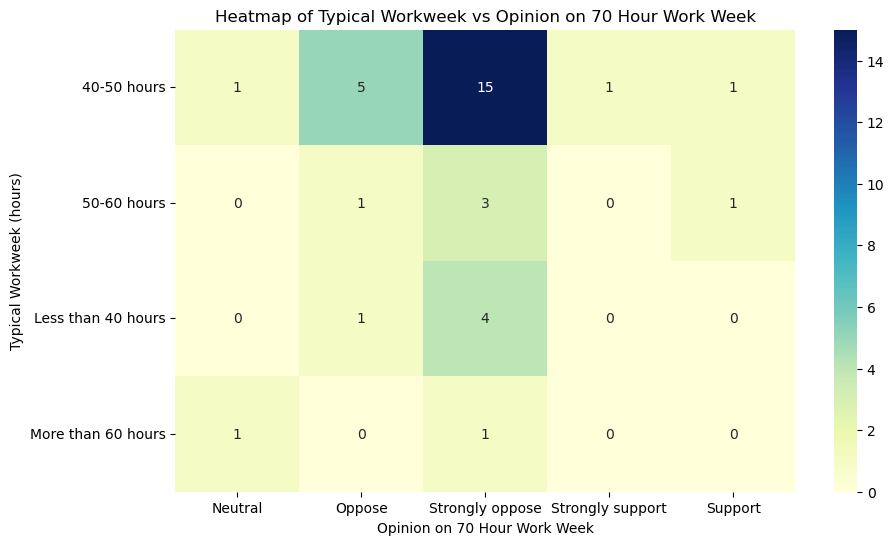

In [39]:
#heatmap plot for the above variables
# Heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(cont_table, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Typical Workweek vs Opinion on 70 Hour Work Week')
plt.xlabel('Opinion on 70 Hour Work Week')
plt.ylabel('Typical Workweek (hours)')
plt.savefig('3-hypo',dpi=500,bbox_inches="tight")
plt.show()


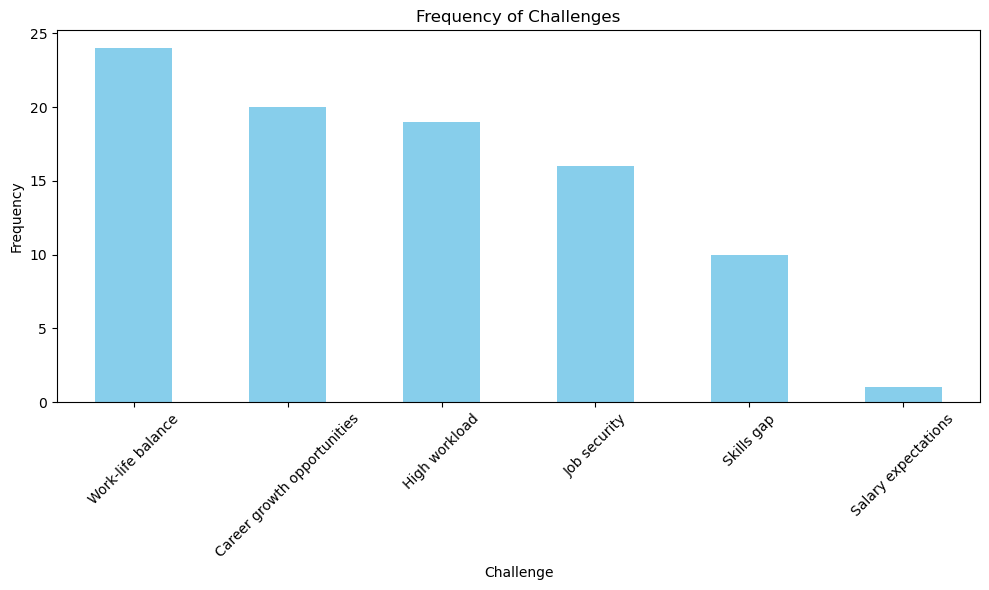

In [119]:
#checking the frequency of challenges
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

# Split each row in 'Challenges' column and expand to count each challenge as a separate entry
challenges = df['What are the biggest challenges you face in your current role? (Select all that apply)  '].str.get_dummies(sep=', ')

# Sum up the counts for each challenge
challenge_counts = challenges.sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
challenge_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Challenges')
plt.xlabel('Challenge')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('1-uni',dpi=500,bbox_inches="tight")
plt.show()


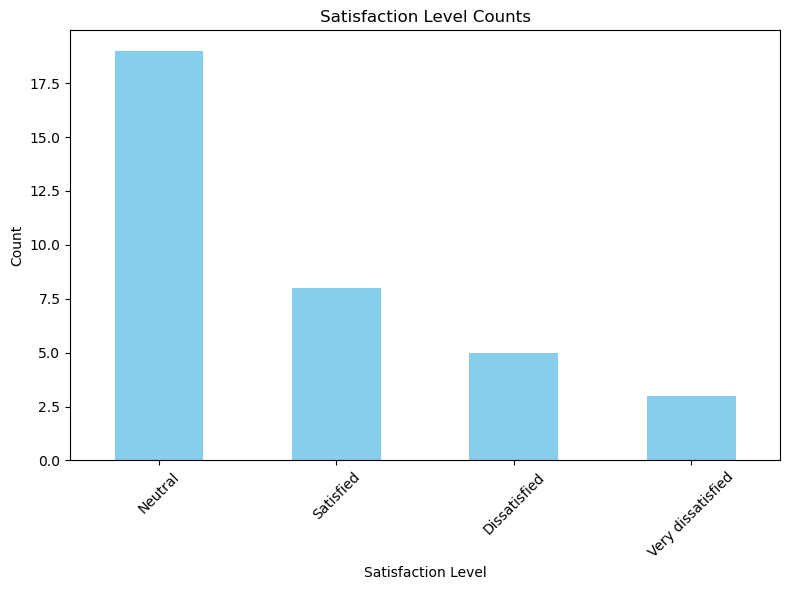

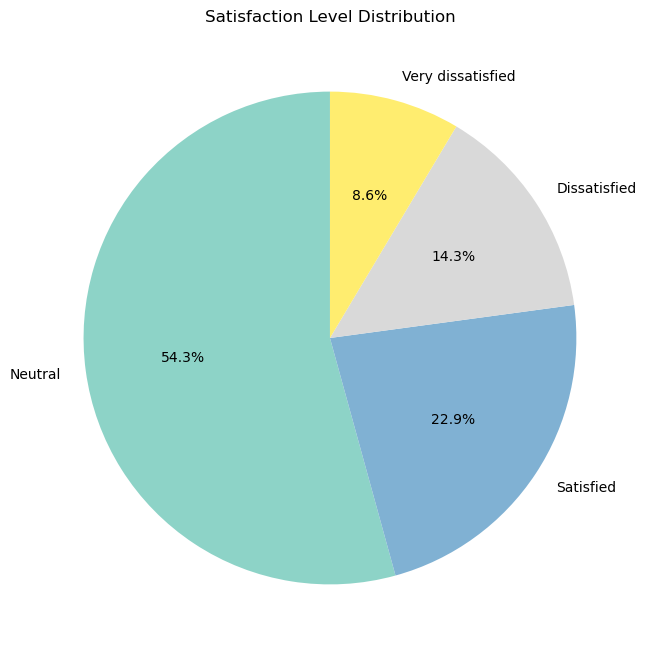

In [121]:
#count of satisfaction 
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

# Get the count of each unique value in 'Satisfaction' column
satisfaction_counts = df['How satisfied are you with the current IT job market in Mumbai?  '].value_counts()

# Plotting as a bar chart
plt.figure(figsize=(8, 6))
satisfaction_counts.plot(kind='bar', color='skyblue')
plt.title('Satisfaction Level Counts')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting as a pie chart (optional)
plt.figure(figsize=(8, 8))
satisfaction_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')
plt.title('Satisfaction Level Distribution')
plt.ylabel('')  # Hide the y-label for cleaner look
plt.savefig('2-uni',dpi=500,bbox_inches="tight")
plt.show()


In [45]:
#hypothesis of job role affecting the perspective of automation taking over the job market
import pandas as pd
from scipy.stats import chi2_contingency

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

# Create a contingency table for job role and opinion on automation
cont_table = pd.crosstab(df['  What is your current job role?  '], df['  Do you believe automation and AI will significantly impact your current job in the next 5 years?  '])

# Display the contingency table
print(cont_table)

# Perform the chi-square test for independence
chi2, p_value, dof, expected = chi2_contingency(cont_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Set significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between job role and opinions on automation.")
else:
    print("Fail to reject the null hypothesis: No significant association between job role and opinions on automation.")


  Do you believe automation and AI will significantly impact your current job in the next 5 years?    Agree  \
  What is your current job role?                                                                              
Data Analyst                                                                                              1   
IT Consultant                                                                                             4   
Others                                                                                                    1   
Software Developer                                                                                        9   

  Do you believe automation and AI will significantly impact your current job in the next 5 years?    Disagree  \
  What is your current job role?                                                                                 
Data Analyst                                                                                             

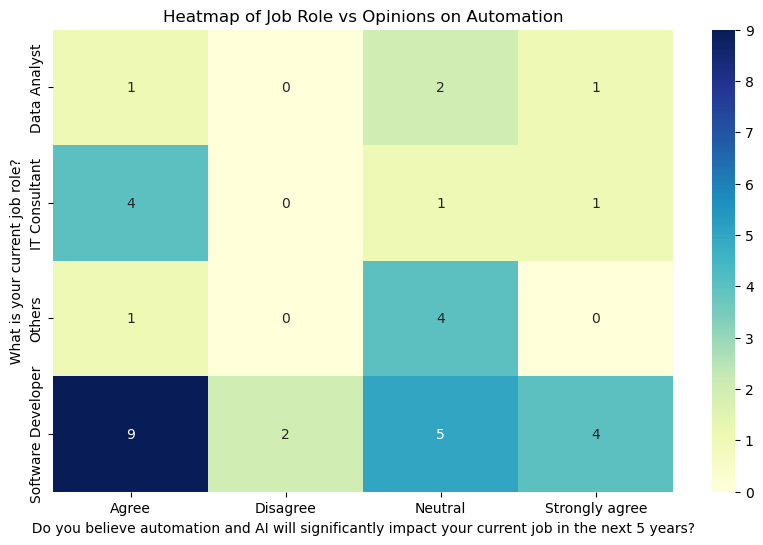

In [47]:
#visualization of the above varibles
# Plot a heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(cont_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Job Role vs Opinions on Automation')
plt.xlabel('  Do you believe automation and AI will significantly impact your current job in the next 5 years?  ')
plt.ylabel('  What is your current job role?  ')
plt.savefig('4-hypo',dpi=500,bbox_inches="tight")
plt.show()


In [49]:
#Hypothesis test between job role and the rate of challenge with respect to upcoming trends
#H0-- There is no relation between job role and the rate of challenge with respect to upcoming trends
# H1--- There is relation between job role and the rate of challenge with respect to upcoming trends
import pandas as pd
from scipy.stats import kruskal

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

# Check column names to make sure they match your data
print(df.columns)

# Group challenging levels by job role
job_roles = df['  What is your current job role?  '].unique()  # Replace with exact column name

# Step 2: Initialize an empty list to store challenge levels for each job role
groups = []

# Step 3: Loop through each job role
for role in job_roles:
    # Step 4: Filter the DataFrame for rows matching the current job role
    filtered_data = df[df['  What is your current job role?  '] == role]
    print('{} is'.format(filtered_data))
    
    # Step 5: Extract the challenge levels for the filtered job role
    challenge_levels = filtered_data[' On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?']
    print(challenge_levels)
    
    # Step 6: Append the challenge levels to the groups list
    groups.append(challenge_levels)

# Perform the Kruskal-Wallis H Test
stat, p_value = kruskal(*groups)

# Output the result
print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between job role and perceived challenge level.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between job role and perceived challenge level.")


Index(['Timestamp',
       'How many years of experience do you have in the IT industry?  ',
       'What is your highest educational qualification? ',
       '  What is your current job role?  ',
       'How satisfied are you with the current IT job market in Mumbai?  ',
       'How easy was it for you to find your first job after completing your education?  ',
       'Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?',
       'What are the biggest challenges you face in your current role? (Select all that apply)  ',
       ' On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?',
       'How well do you think your education prepared you for your current job in the IT industry?  ',
       ' How long did it take you to adapt to the work culture in your first IT job?  ',
       'What steps do you take to stay update

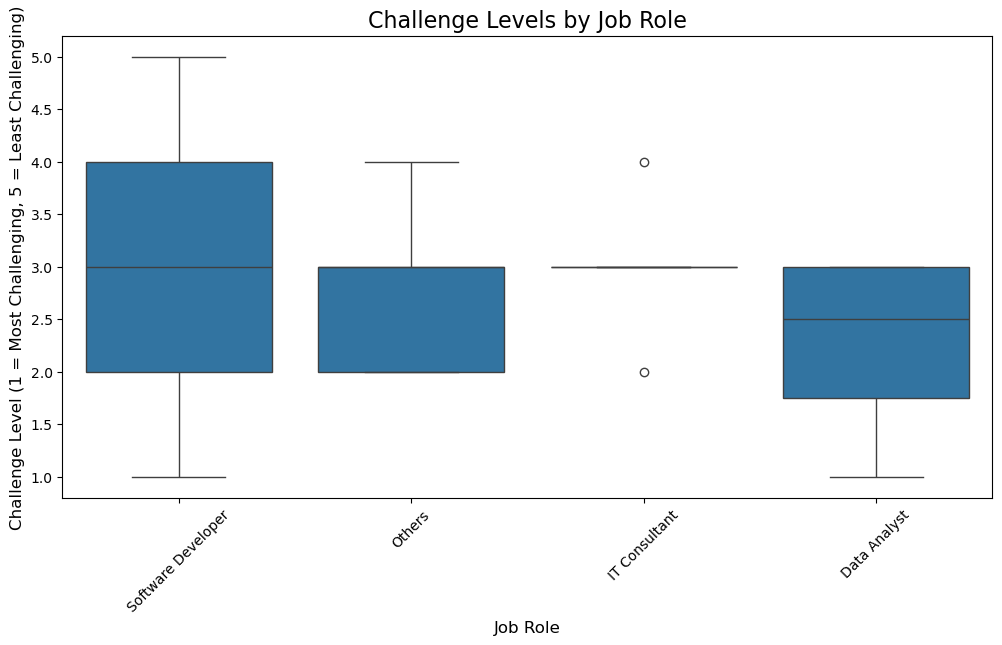

In [13]:
#box plot for the above 2 varibales
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

# Adjust column names (remove leading/trailing spaces if needed)
df.columns = df.columns.str.strip()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='What is your current job role?',
    y='On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?',
    data=df
)
plt.title('Challenge Levels by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Challenge Level (1 = Most Challenging, 5 = Least Challenging)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

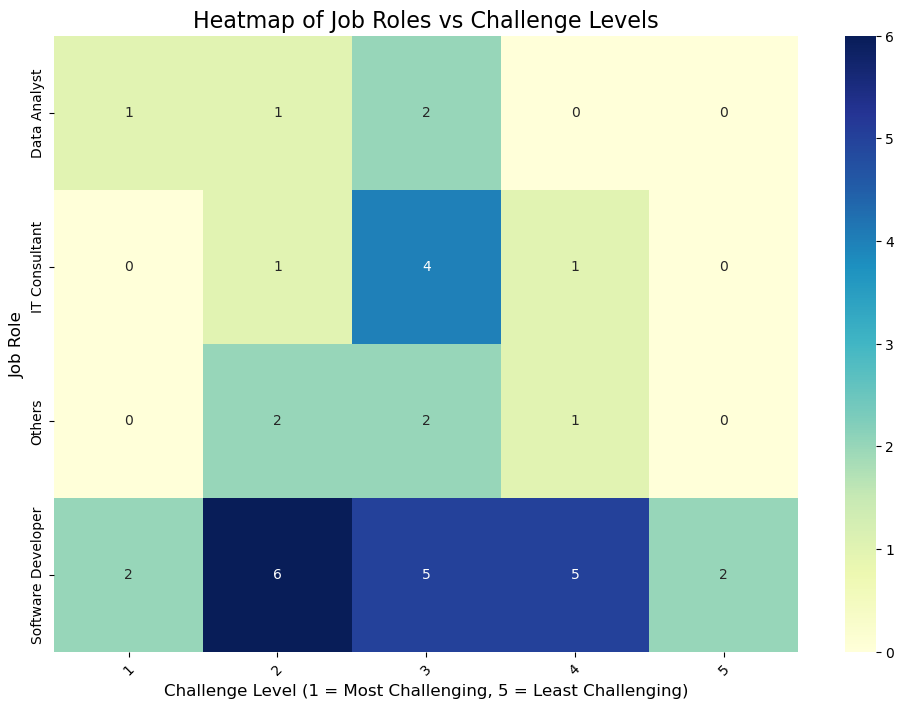

In [51]:
#heatmap for the baove 2 variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

# Adjust column names (remove leading/trailing spaces if needed)
df.columns = df.columns.str.strip()

# Create a contingency table
cont_table = pd.crosstab(
    df['What is your current job role?'],
    df['On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?']
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    cont_table,
    annot=True,  # Annotate cells with values
    fmt="d",     # Format for integer values
    cmap="YlGnBu",  # Color map
    cbar=True    # Show color bar
)
plt.title("Heatmap of Job Roles vs Challenge Levels", fontsize=16)
plt.xlabel("Challenge Level (1 = Most Challenging, 5 = Least Challenging)", fontsize=12)
plt.ylabel("Job Role", fontsize=12)
plt.xticks(rotation=45)
plt.savefig('5-hypo',dpi=500,bbox_inches="tight")
plt.show()


In [125]:
#hypothesis between challenge to keep up with the industry trends and future visions
import pandas as pd
from scipy.stats import kruskal

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")
print(df.columns)
# Adjust column names (remove leading/trailing spaces if needed)
df.columns = df.columns.str.strip()

# Group ordinal data by categories of the second variable
categories = df['Where do you see yourself in the next 5 years in the IT industry?'].unique()  # Replace with exact column name
groups = []  # Initialize an empty list to store the groups

for category in categories:
    # Filter the DataFrame for the current category
    filtered_data = df[df['Where do you see yourself in the next 5 years in the IT industry?'] == category]
    
    # Select the ordinal values corresponding to the current category
    ordinal_values = filtered_data[
        'On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?'
    ]
    
    # Append the ordinal values to the groups list
    groups.append(ordinal_values)


# Perform Kruskal-Wallis H Test
stat, p_value = kruskal(*groups)

# Output results
print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the variables.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between the variables.")



Index(['Timestamp',
       'How many years of experience do you have in the IT industry?  ',
       'What is your highest educational qualification? ',
       '  What is your current job role?  ',
       'How satisfied are you with the current IT job market in Mumbai?  ',
       'How easy was it for you to find your first job after completing your education?  ',
       'Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?',
       'What are the biggest challenges you face in your current role? (Select all that apply)  ',
       ' On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?',
       'How well do you think your education prepared you for your current job in the IT industry?  ',
       ' How long did it take you to adapt to the work culture in your first IT job?  ',
       'What steps do you take to stay update

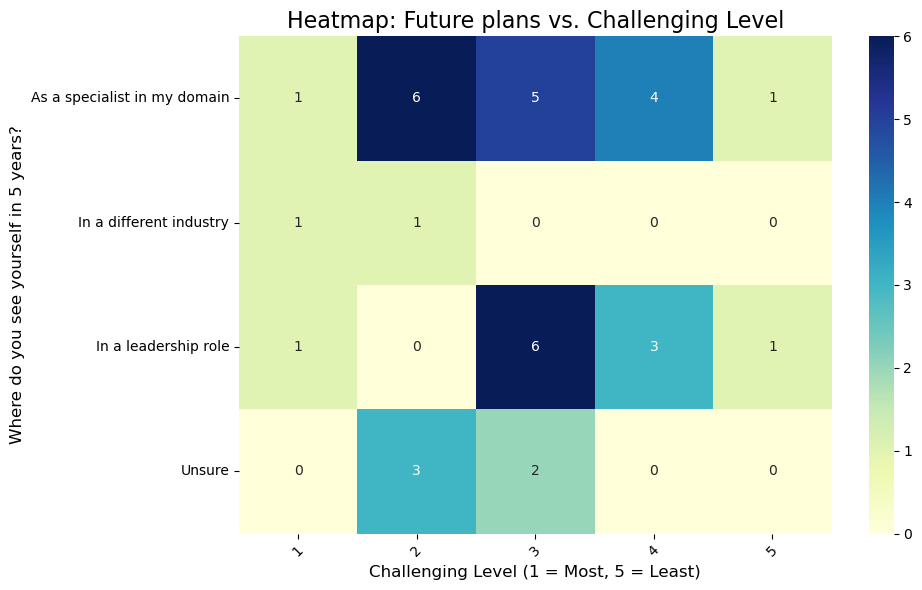

In [127]:
#heatmap for the visualization of both the above variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")

# Adjust column names (remove leading/trailing spaces if needed)
df.columns = df.columns.str.strip()

# Create a contingency table
cont_table = pd.crosstab(
    df['Where do you see yourself in the next 5 years in the IT industry?'], 
    df['On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?']
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cont_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title("Heatmap: Future plans vs. Challenging Level", fontsize=16)
plt.xlabel("Challenging Level (1 = Most, 5 = Least)", fontsize=12)
plt.ylabel("Where do you see yourself in 5 years?", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('6-hypo',dpi=500,bbox_inches="tight")
plt.show()


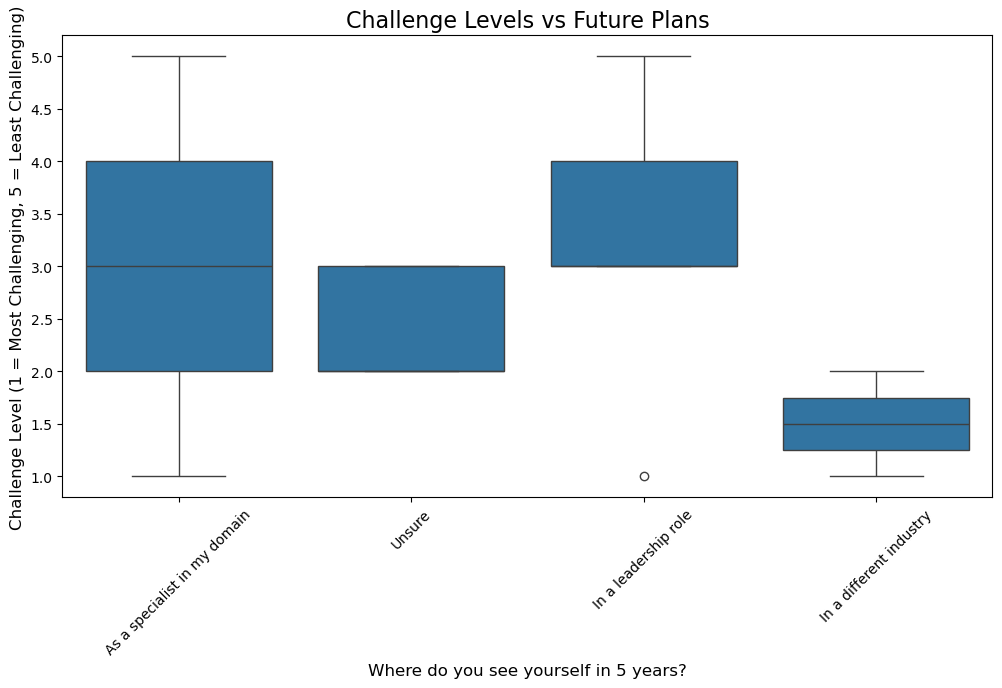

In [31]:
#boxplot for the above 2 variables
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Where do you see yourself in the next 5 years in the IT industry?',
    y='On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?',
    data=df
)
plt.title("Challenge Levels vs Future Plans", fontsize=16)
plt.xlabel("Where do you see yourself in 5 years?", fontsize=12)
plt.ylabel("Challenge Level (1 = Most Challenging, 5 = Least Challenging)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [57]:
# hypothesis testing to find the relation between work culture and the opinion on the proposed 70 hour work culture
import pandas as pd
from scipy.stats import kruskal

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")  # Replace with your file path
print(df.columns)

# Adjust column names (remove leading/trailing spaces if needed)
df.columns = df.columns.str.strip()

# Map ordinal variables to numeric values
opinion_mapping = {
    'Strongly Oppose': 1,
    'Oppose': 2,
    'Neutral': 3,
    'Support': 4,
    'Strongly Support': 5
}
df['Opinion Numeric'] = df['What is your opinion on the proposed 70-hour workweek by Narayan Sathyamurthy?'].map(opinion_mapping)

# Group the dependent variable by the independent variable
work_culture_groups = df['How would you rate the work culture in your current company?'].unique()
grouped_data = [
    df[df['How would you rate the work culture in your current company?'] == group]['Opinion Numeric'].dropna()
    for group in work_culture_groups
]

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*grouped_data)

# Print the results
print(f"Kruskal-Wallis Statistic: {stat}")
print(f"p-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The opinion on the proposed 70-hour workweek significantly differs across work culture ratings.")
else:
    print("Fail to reject the null hypothesis: The opinion on the proposed 70-hour workweek does not significantly differ across work culture ratings.")


Index(['Timestamp',
       'How many years of experience do you have in the IT industry?  ',
       'What is your highest educational qualification? ',
       '  What is your current job role?  ',
       'How satisfied are you with the current IT job market in Mumbai?  ',
       'How easy was it for you to find your first job after completing your education?  ',
       'Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?',
       'What are the biggest challenges you face in your current role? (Select all that apply)  ',
       ' On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?',
       'How well do you think your education prepared you for your current job in the IT industry?  ',
       ' How long did it take you to adapt to the work culture in your first IT job?  ',
       'What steps do you take to stay update

In [131]:
# hypothesis testing to find the relation between work culture and the opinion on the proposed 70 hour work culture
import pandas as pd
from scipy.stats import chi2_contingency

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")  # Replace with your file path
print(df.columns)

# Adjust column names (remove leading/trailing spaces if needed)
df.columns = df.columns.str.strip()

# Create a contingency table for the two categorical variables
# Replace 'Variable1' and 'Variable2' with the actual column names
contingency_table = pd.crosstab(df['How would you rate the work culture in your current company?'], df['What is your opinion on the proposed 70-hour workweek by Narayan Sathyamurthy?'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Interpret the p-value
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the variables.")


Index(['Timestamp',
       'How many years of experience do you have in the IT industry?  ',
       'What is your highest educational qualification? ',
       '  What is your current job role?  ',
       'How satisfied are you with the current IT job market in Mumbai?  ',
       'How easy was it for you to find your first job after completing your education?  ',
       'Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?',
       'What are the biggest challenges you face in your current role? (Select all that apply)  ',
       ' On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?',
       'How well do you think your education prepared you for your current job in the IT industry?  ',
       ' How long did it take you to adapt to the work culture in your first IT job?  ',
       'What steps do you take to stay update

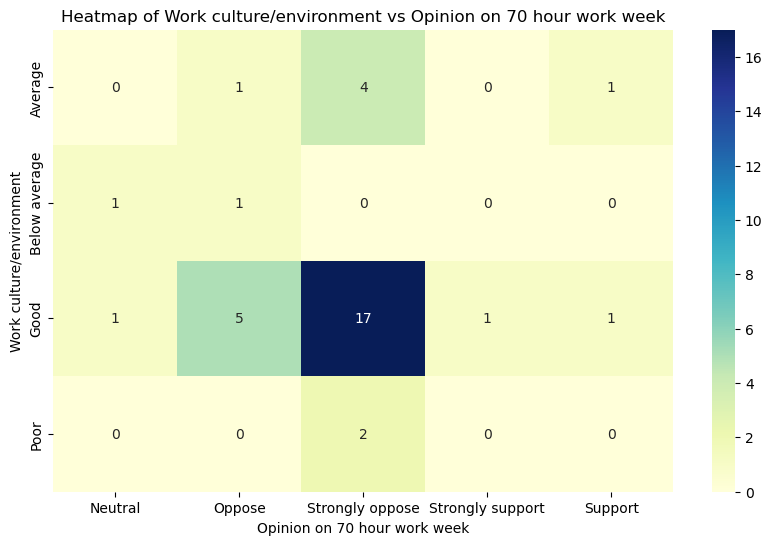

In [133]:
#heatmap to plot the values of the above 2 variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")  # Replace with your file path

# Adjust column names (remove leading/trailing spaces if needed)
df.columns = df.columns.str.strip()

# Create a contingency table
# Replace 'Variable1' and 'Variable2' with the actual column names
contingency_table = pd.crosstab(df['How would you rate the work culture in your current company?'], df['What is your opinion on the proposed 70-hour workweek by Narayan Sathyamurthy?'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')

# Add labels and title
plt.title('Heatmap of Work culture/environment vs Opinion on 70 hour work week')
plt.xlabel('Opinion on 70 hour work week')
plt.ylabel('Work culture/environment')
plt.savefig('7-hypo',dpi=500,bbox_inches="tight")
# Show the plot
plt.show()


Index(['Timestamp',
       'How many years of experience do you have in the IT industry?',
       'What is your highest educational qualification?',
       'What is your current job role?',
       'How satisfied are you with the current IT job market in Mumbai?',
       'How easy was it for you to find your first job after completing your education?',
       'Do you think it has become more difficult to find jobs in this current scenario as compared to your phase?',
       'What are the biggest challenges you face in your current role? (Select all that apply)',
       'On a scale of 1 to 5, how challenging is it to keep up with the rapidly changing technology landscape with 1 being the most challenging and 5 being the least challenging?',
       'How well do you think your education prepared you for your current job in the IT industry?',
       'How long did it take you to adapt to the work culture in your first IT job?',
       'What steps do you take to stay updated with industry tre

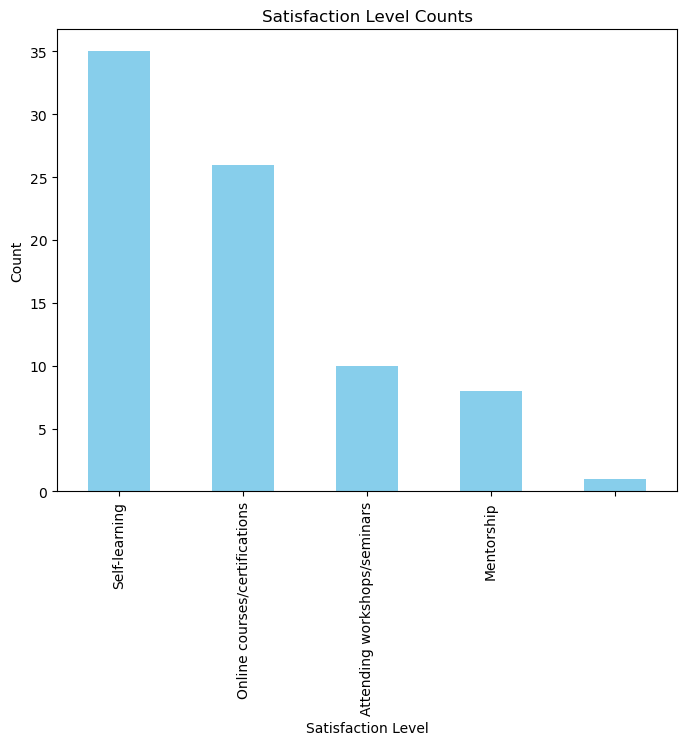

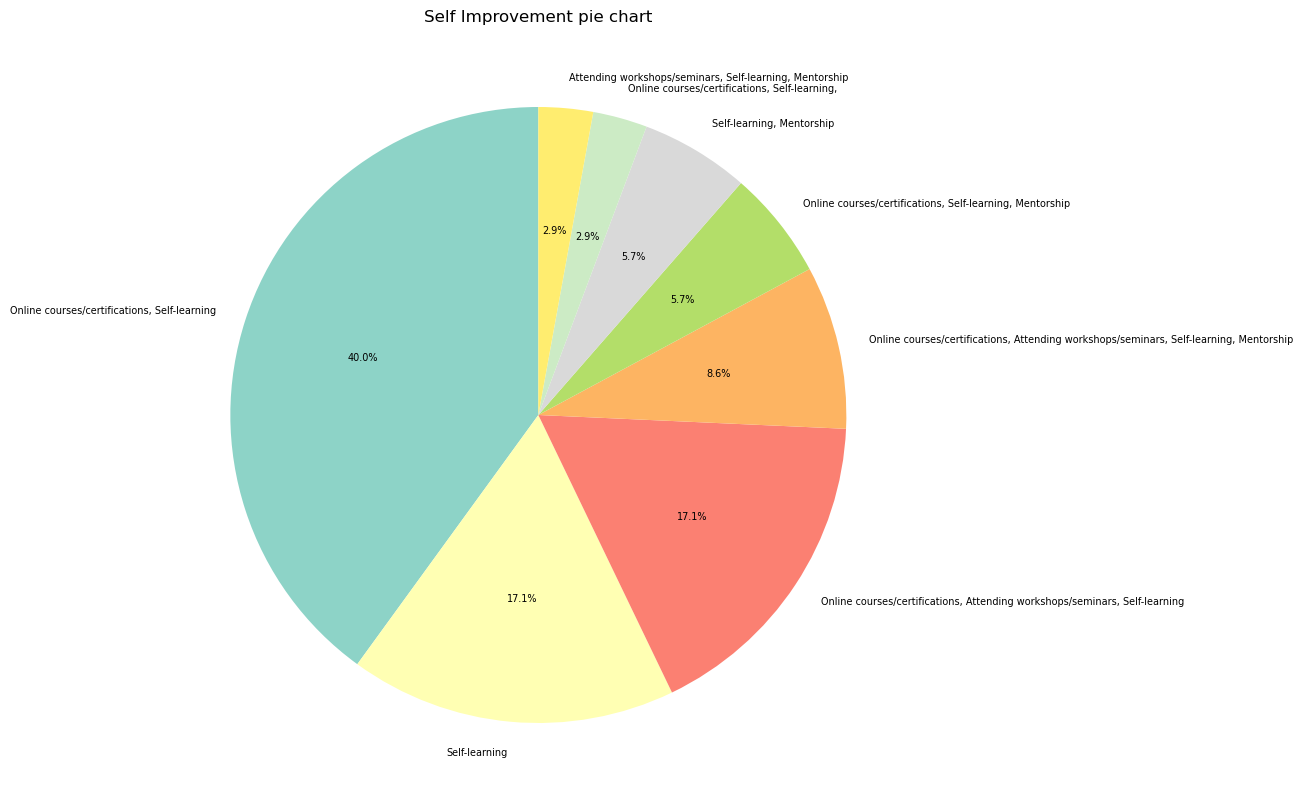

In [135]:
#univariate analysis of counts of self improvement techniques 
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:/Users/Admin/Downloads/Socio_economic_aspects_of_IT_(Responses).xlsx")
# Adjust column names (remove leading/trailing spaces if needed)
df.columns = df.columns.str.strip()
print(df.columns)

# Get the count of each unique value in 'Satisfaction' column
satisfaction_counts = df['What steps do you take to stay updated with industry trends? (Select all that apply)'].value_counts()

# Extract the relevant column and handle non-string values
column_data = df['What steps do you take to stay updated with industry trends? (Select all that apply)']
string_values = column_data[column_data.apply(lambda x: isinstance(x, str))]  # Keep only strings

# Split the strings into individual items
all_steps = string_values.str.split(', ')

# Flatten the list of lists into a single list
all_steps_flat = [step for sublist in all_steps for step in sublist]

# Get the count of each unique step
steps_counts = pd.Series(all_steps_flat).value_counts()


# Plotting as a bar chart
plt.figure(figsize=(8, 6))
steps_counts.plot(kind='bar', color='skyblue')
plt.title('Satisfaction Level Counts')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

# Plotting as a pie chart (optional)
plt.figure(figsize=(10,10))
ax= satisfaction_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')
# Modify font size of labels and percentage text
for text in ax.texts:
    text.set_fontsize(7)  # Adjust the font size here
plt.title('Self Improvement pie chart')
plt.ylabel('')  # Hide the y-label for cleaner look
plt.savefig('3-uni',dpi=500,bbox_inches="tight")
plt.show()